<a href="https://colab.research.google.com/github/Jeetsmeats/AI4R/blob/main/Gymnasium_and_RL_v2024_07_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI4R Workshop 3: Gymnasium and Reinforcement Learning Training

## Activity 1: Setting up the Environment

### Dependencies
- We will be using `gymnasium` framework as an interface to represent general RL Problems. Dependencies for installation: `swig`
- The example for demonstration is the `Lunar Lander` which requires additional dependencies (`Box2D`)
- Deep Learning Training Library `stable_baselines3`

### Next Steps
- [ ] Press `Connect` in the top-right corner of the notebook to connect to a Python Kernel (running on a remote server hosted by Google).
- [ ] To run each cell, place the cursor on the cell and press: `shift` + `enter/return`. An easier option is to just
- Cells should be marked 'square with a spinning circle' while running, which will go away once the cell execution is complete, and cell outputs will be displayed below (if applicable)
- It might take some time for the dependency installation, please be patient and let it continue.

In [1]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.4 MB/s eta 0:00:00


In [2]:
!pip install gymnasium[box2D]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 25.7 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376102 sha256=57110a04a34af169a535325b7cf04147f6d016fcb1e1be650c7a04464a6c6f83
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [3]:
!pip install stable_baselines3

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

### Library Imports

Let's import the necessary libraries for our activity

In [4]:
import gymnasium as gym
from stable_baselines3 import PPO, DDPG, SAC, TD3

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython.display import HTML

Supress warnings:

In [5]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning, module="ipykernel.ipkernel")

## Activity 2: Getting Familiar with Gymnasium Environments

> Gymnasium is an API standard for Reinforcement Learning (RL) with an interface that is simple, pythonic, and capable of representing general RL problems.

Key functions:
- `make()`: Create the environment
- `reset()`: Reset the environment to the 'initial state'
- `step()`: Compute the transition kernel, as the environment takes a step with a current action
- `render()`: Render the environment for visualisation

Key details:
- `observation_space` : defines the observation space
- `action_space`: defines the action space

### Let's define our Gymnasium Environment [Lunar Lander](https://gymnasium.farama.org/environments/box2d/lunar_lander/)

the `make()` function creates the `LunarLander-v2` environment (built-in environment) in `continuous` mode. Other arguments set details such as `gravity`, `wind`, `wind_power`, `turbulence`, `render_mode`, etc.  

Other Details:
> If `enable_wind=True` is passed, there will be wind effects applied to the lander. The wind is generated using the function `tanh(sin(2 k (t+C)) + sin(pi k (t+C)))`. k is set to 0.01. C is sampled randomly between -9999 and 9999.

> `wind_power` dictates the maximum magnitude of linear wind applied to the craft. The recommended value for `wind_power` is between 0.0 and 20.0. `turbulence_power` dictates the maximum magnitude of rotational wind applied to the craft. The recommended value for `turbulence_power` is between 0.0 and 2.0.

In [59]:
env = gym.make(
    "LunarLander-v2",
    continuous=True,
    gravity=-10.0,
    enable_wind=False,
    wind_power=15.0,
    turbulence_power=1.5,
    render_mode = "rgb_array"
)

### Observations:
The state is an 8-dimensional vector: the coordinates of the lander in `x` & `y`, its linear velocities in `x` & `y`, its `angle`, its `angular velocity`, and `two booleans` that represent whether each leg is in contact with the ground or not. Let's take a look at the observation space for the Lunar Lander environment:

In [60]:
# Print the observation space
print("Observation Space:", env.observation_space)
print("Shape:", env.observation_space.shape)
print("Sample Observation:", env.observation_space.sample())

Observation Space: Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
Shape: (8,)
Sample Observation: [ 0.6117237  -0.5541325  -3.4065907   4.6851377  -2.5309353   0.77775425
  0.51048964  0.8202921 ]


### Initial State

Let's **`reset()`** the environment to it's initial state: (`obs` is the observation corresponding to the initial state)

In [68]:
obs, info = env.reset()
print(obs)

[-0.00790415  1.419452   -0.80063343  0.37916163  0.00916584  0.18135534
  0.          0.        ]


### Render the environment at Initial State:

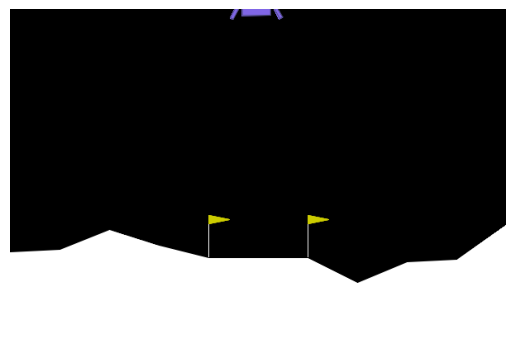

In [69]:
def plot_current_frame(env):
    frame = env.render()    # calls the `render()` function to render the frame
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

plot_current_frame(env)

### Action Space

- If `continuous=True` is passed, continuous actions (corresponding to the throttle of the engines) will be used and the action space will be `Box(-1, +1, (2,), dtype=np.float32)`.
- The first coordinate of an action determines the throttle of the main engine, while the second coordinate specifies the throttle of the lateral boosters.
    - Given an action `np.array([main, lateral])`
        - the main engine will be turned off completely if main < 0
        - the throttle scales affinely from 50% to 100% for `0 <= main <= 1` (in particular, the main engine doesn’t work with less than 50% power).
    - Similarly
        - if `-0.5 < lateral < 0.5`, the lateral boosters will not fire at all.
        - If lateral < -0.5, the left booster will fire, and
        - if lateral > 0.5, the right booster will fire.
    - Again, the throttle scales affinely from 50% to 100% between -1 and -0.5 (and 0.5 and 1, respectively).

In [70]:
# Print the action space
print("Action Space:", env.action_space)
print("Shape:", env.action_space.shape)
print("Low:", env.action_space.low)
print("High:", env.action_space.high)
print("Sample Action:", env.action_space.sample())

Action Space: Box(-1.0, 1.0, (2,), float32)
Shape: (2,)
Low: [-1. -1.]
High: [1. 1.]
Sample Action: [0.08990555 0.6492532 ]


### Reward Function / `Step()`:

After every step a reward is granted. The total reward of an episode is the sum of the rewards for all the steps within that episode.

For each step, the reward:

- is increased/decreased the closer/further the lander is to the landing pad.
- is increased/decreased the slower/faster the lander is moving.
- is decreased the more the lander is tilted (angle not horizontal).
- is increased by 10 points for each leg that is in contact with the ground.
- is decreased by 0.03 points each frame a side engine is firing.
- is decreased by 0.3 points each frame the main engine is firing.
- The episode receive an additional reward of -100 or +100 points for crashing or landing safely respectively.

An episode is considered a solution if it scores at least 200 points.

If you are interested you can take a look at how the rewards of the Lunar Lander are calculated inside the [Lunar Lander Class](https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/box2d/lunar_lander.py#L638-L662)

Let's sample a random action from the action space and take a `step()` within the environment:

In [71]:
# Get a random action from the action space:
action = env.action_space.sample()
print("Random action: ", action)

# Take a step with the random action:
obs, reward, done, terminate, info = env.step(action)

print("Observation:", obs)
print("Reward:", reward)
print("Done:", done)
print("Terminate:", terminate)
print("Info:", info)

Random action:  [0.41192743 0.5630544 ]
Observation: [-0.01569309  1.4283476  -0.7870162   0.39529115  0.01720309  0.16076002
  0.          0.        ]
Reward: -1.4116958989335104
Done: False
Terminate: False
Info: {}


Let's render the environment after the Random Action:

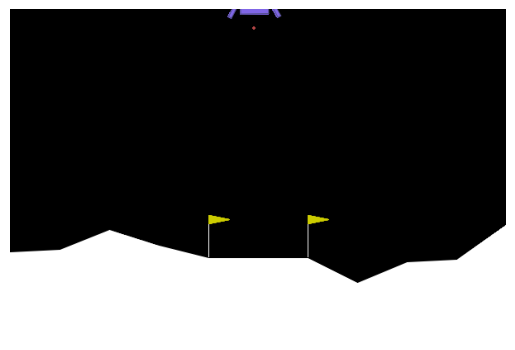

In [72]:
plot_current_frame(env)

Let's create a function that takes a random step:

In [66]:
def take_random_step(env):
    action = env.action_space.sample()
    print("Action: {}".format(action))
    obs, reward, done, truncate, info = env.step(action)

Action: [0.9188816  0.54582345]


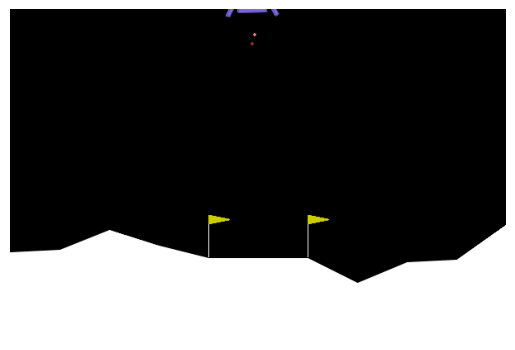

Action: [-0.6970811  -0.49152532]


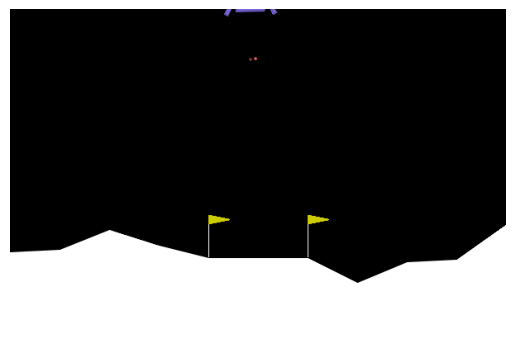

Action: [-0.31390765  0.35414267]


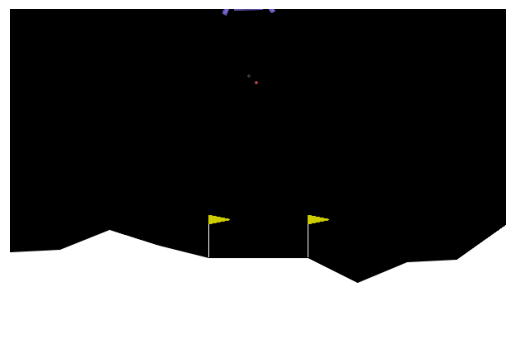

Action: [ 0.34117097 -0.4381472 ]


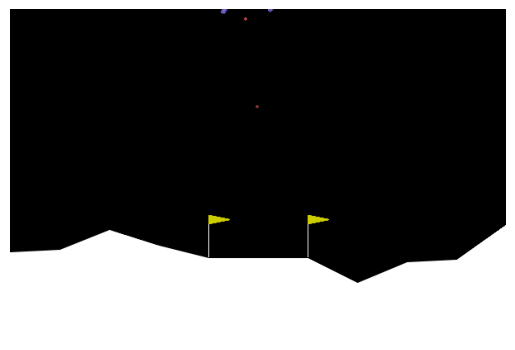

Action: [-0.3331512  -0.62809736]


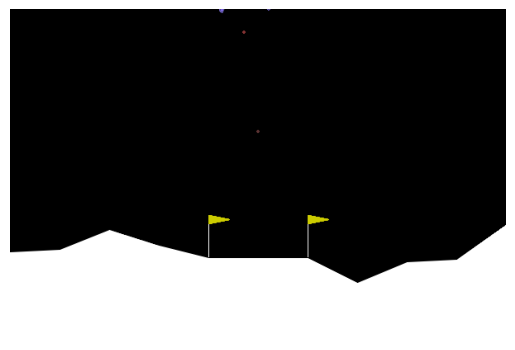

Action: [-0.5913361 -0.5766992]


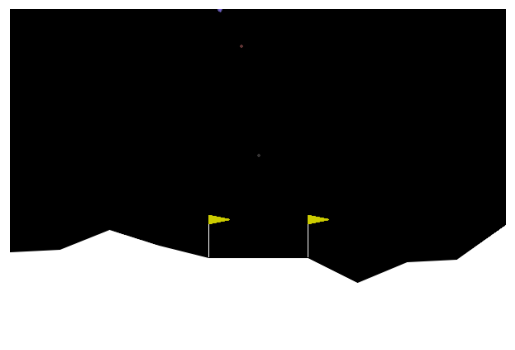

Action: [0.93758106 0.3252786 ]


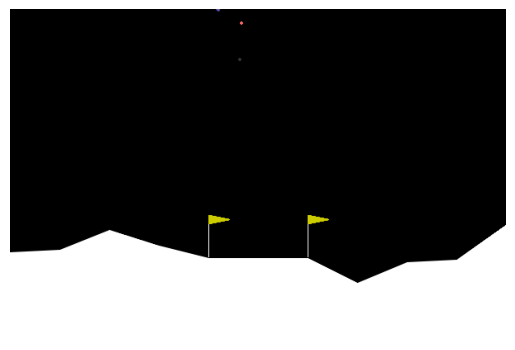

Action: [0.4525817 0.7730631]


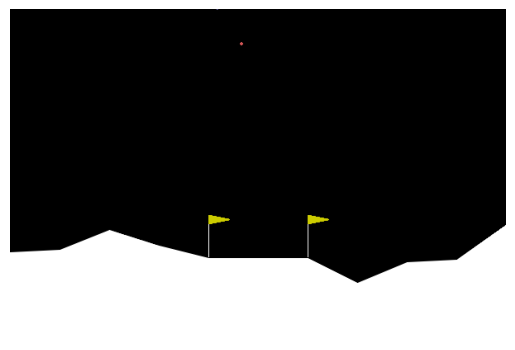

Action: [ 0.1228931 -0.542133 ]


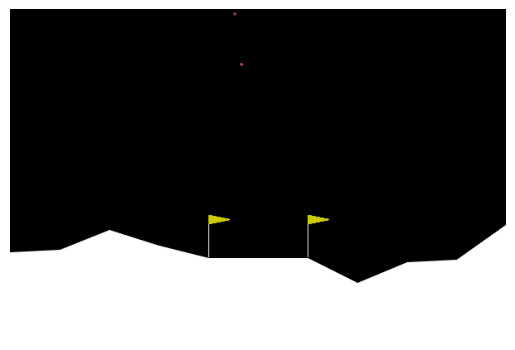

Action: [0.6277356  0.09070369]


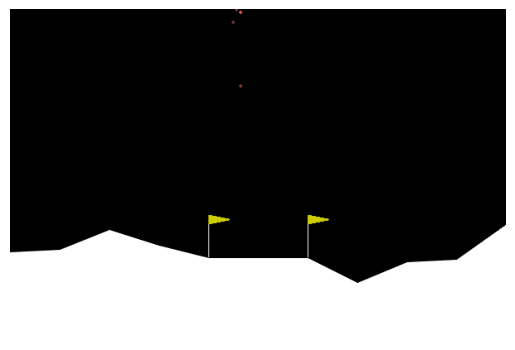

Action: [-0.6523085   0.73863333]


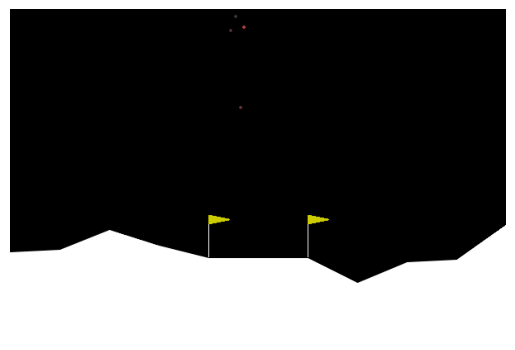

Action: [0.41442814 0.01161595]


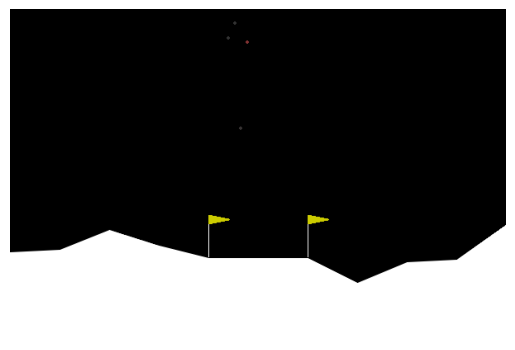

Action: [ 0.8601251 -0.5064627]


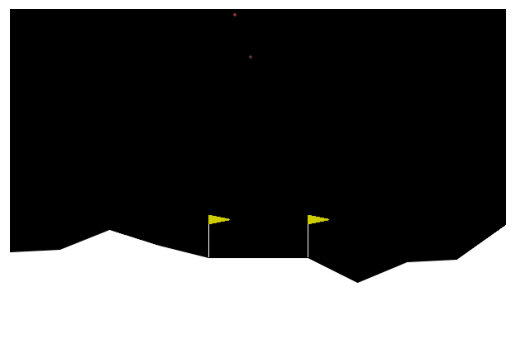

Action: [0.91471905 0.8358955 ]


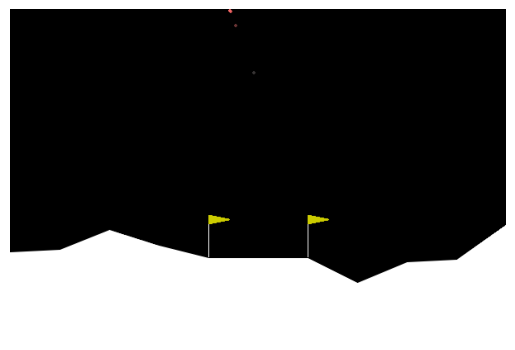

Action: [-0.9630032 -0.9122163]


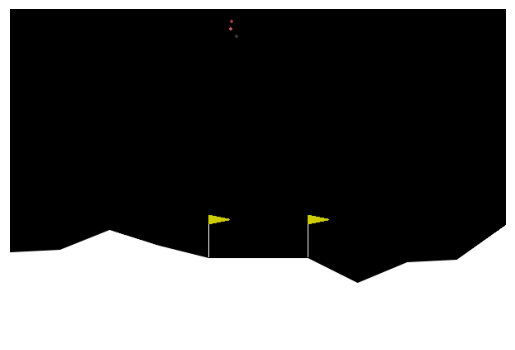

Action: [ 0.46152255 -0.6462144 ]


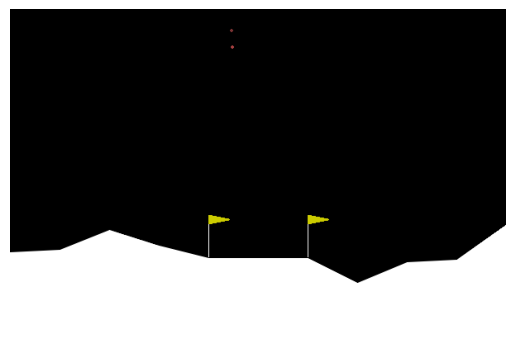

Action: [-0.9456818   0.85107976]


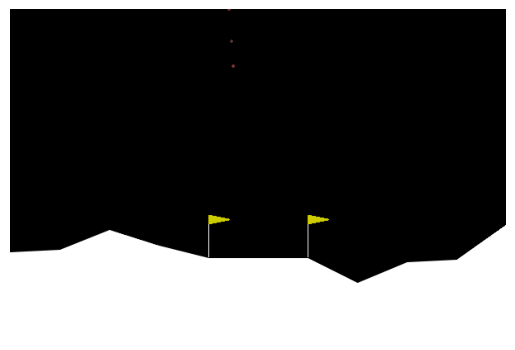

Action: [0.31113452 0.5932827 ]


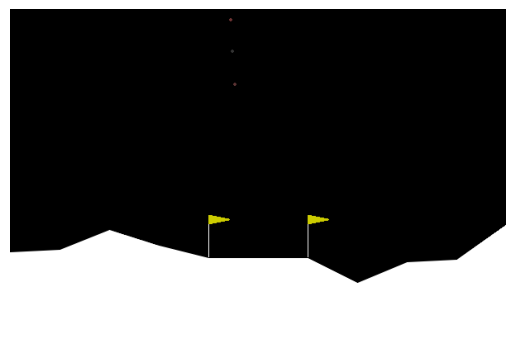

Action: [-0.66066873 -0.9767217 ]


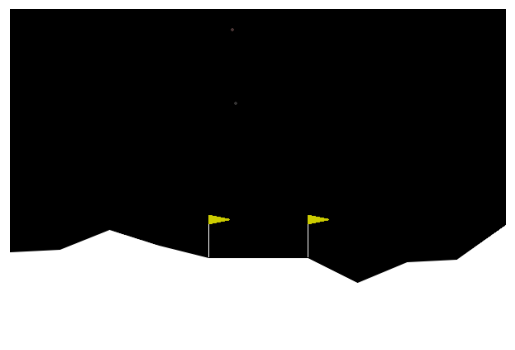

Action: [ 0.7845025 -0.5231946]


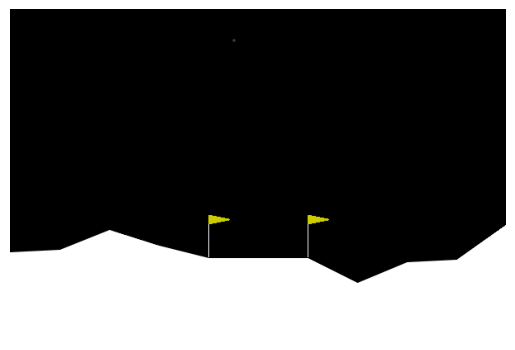

Action: [-0.69296664 -0.43617743]


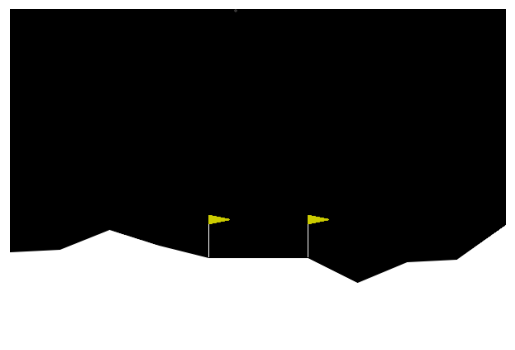

Action: [0.8466801  0.94240874]


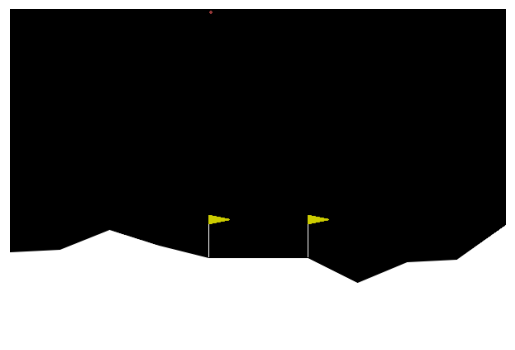

Action: [ 0.2178463  -0.22083524]


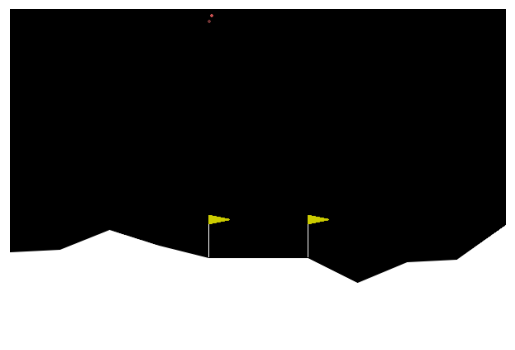

Action: [-0.9539853  -0.33443218]


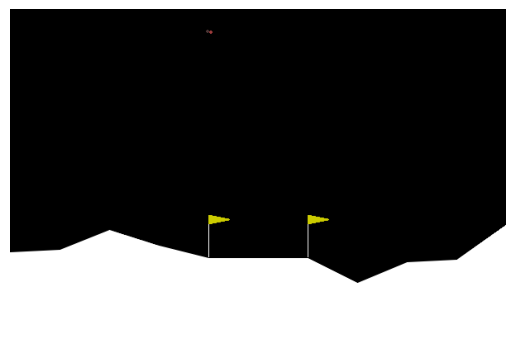

Action: [0.32060096 0.31117296]


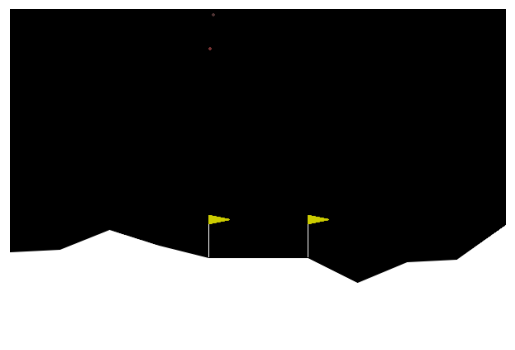

Action: [ 0.17638619 -0.7224366 ]


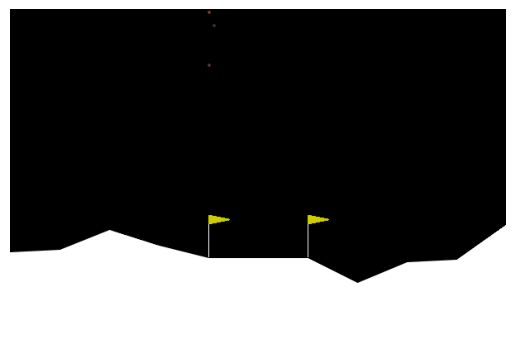

Action: [-0.67791283 -0.6332203 ]


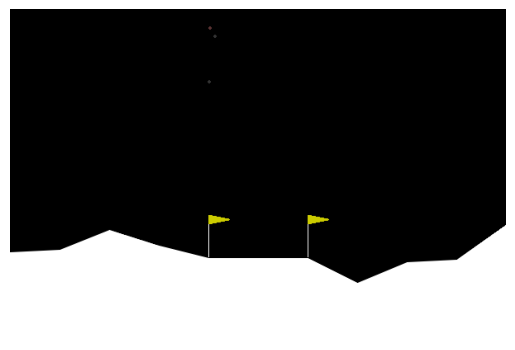

Action: [-0.07138503 -0.8185224 ]


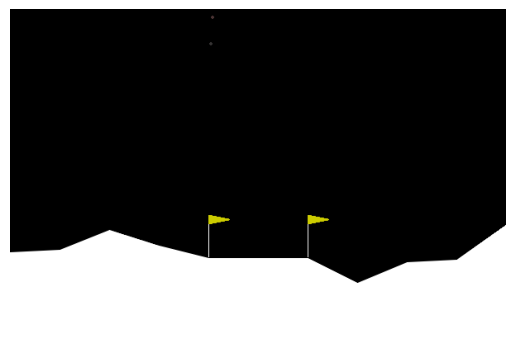

Action: [ 0.6274188 -0.5716712]


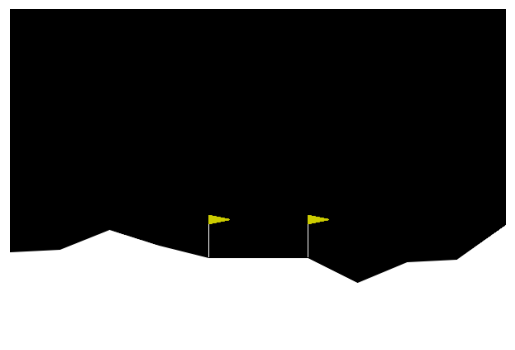

Action: [ 0.9153523  -0.01990168]


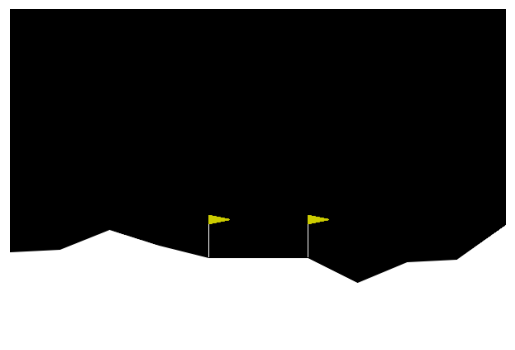

Action: [0.6448955 0.6040044]


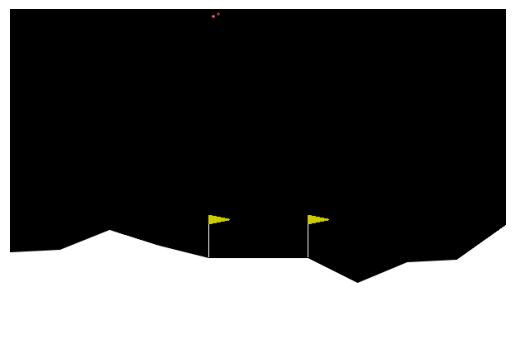

Action: [-0.9126486   0.44258642]


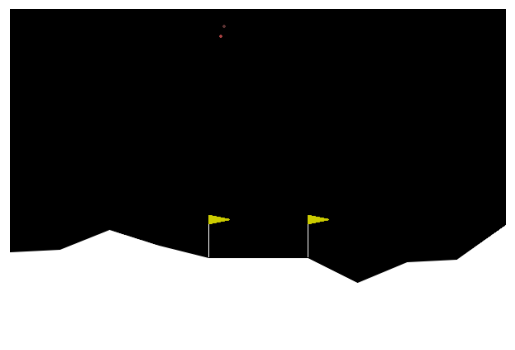

Action: [ 0.7286724  -0.21601237]


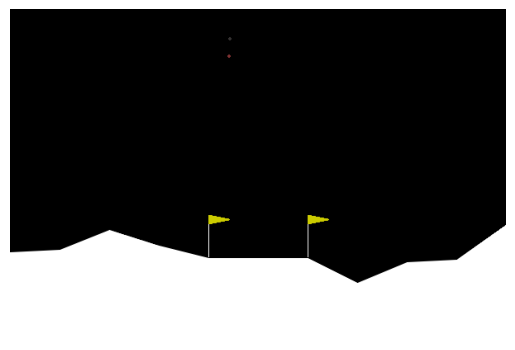

Action: [-0.99640983  0.5338523 ]


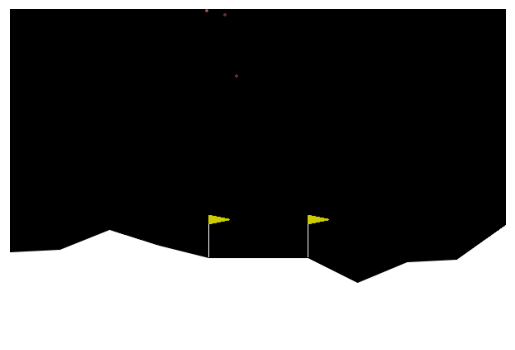

Action: [ 0.13708837 -0.66139525]


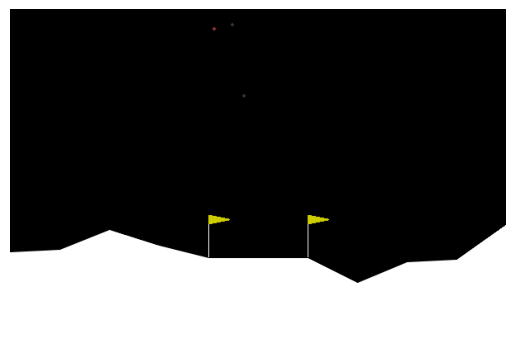

Action: [ 0.5353943  -0.08538518]


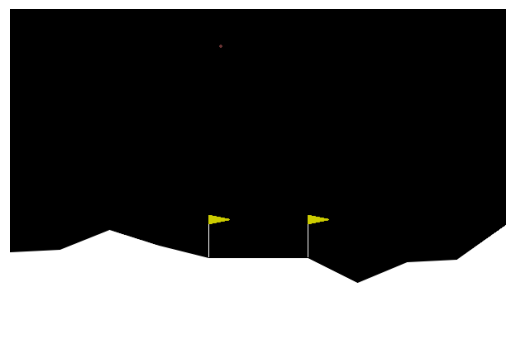

Action: [ 0.43479288 -0.74995804]


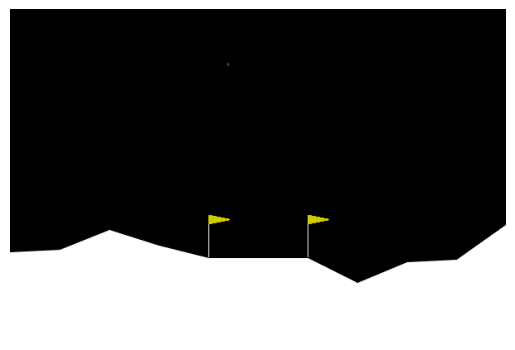

Action: [0.13183072 0.20527318]


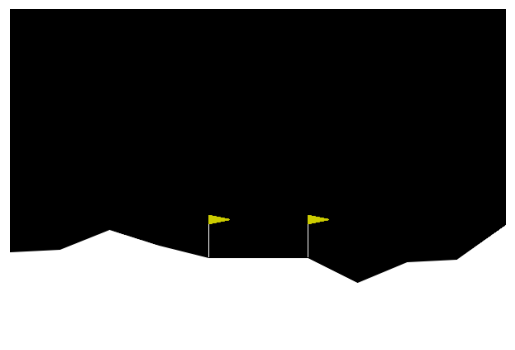

Action: [-0.09559219  0.6929145 ]


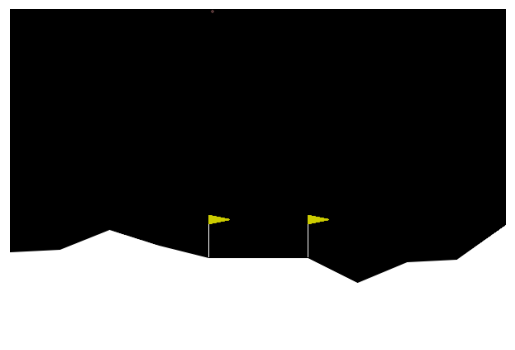

Action: [0.483173  0.6206453]


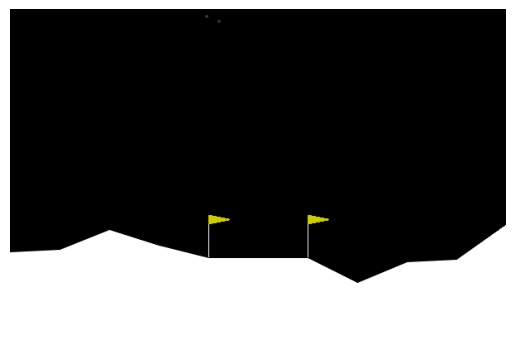

Action: [0.3207098  0.29979137]


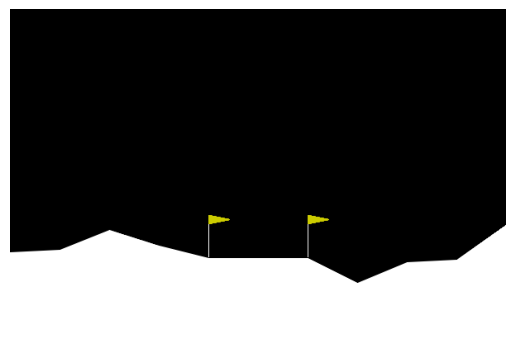

Action: [0.6015726  0.37596864]


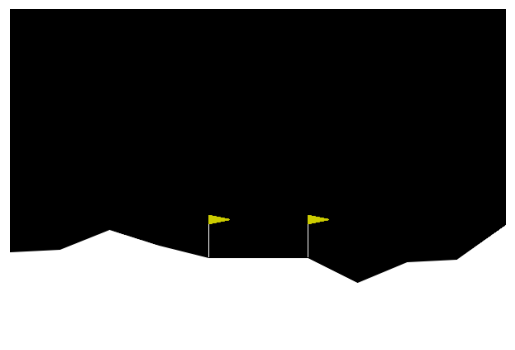

Action: [-0.47763315  0.55065143]


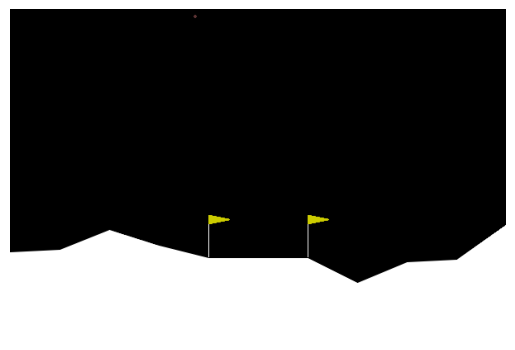

Action: [-0.88739866  0.28856412]


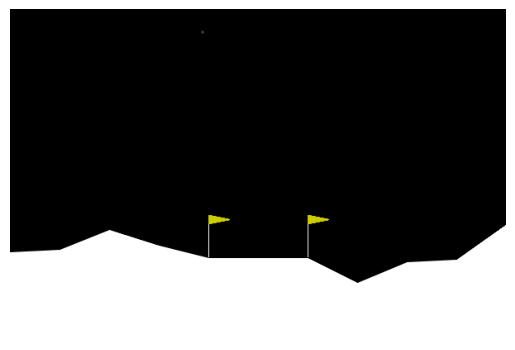

Action: [0.98727137 0.6272129 ]


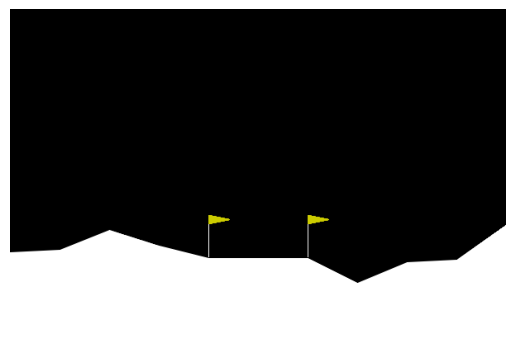

Action: [ 0.90553963 -0.59594345]


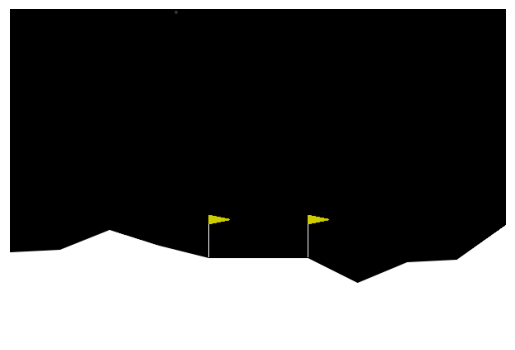

Action: [ 0.99518913 -0.2016874 ]


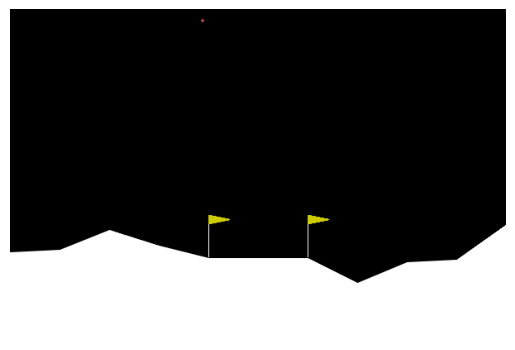

Action: [ 0.7023753  -0.70996815]


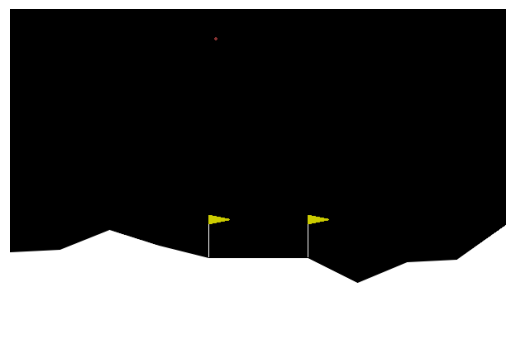

Action: [ 0.04086541 -0.01247988]


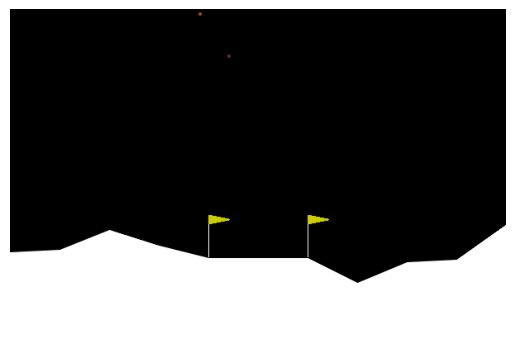

Action: [-0.1589007 -0.6728493]


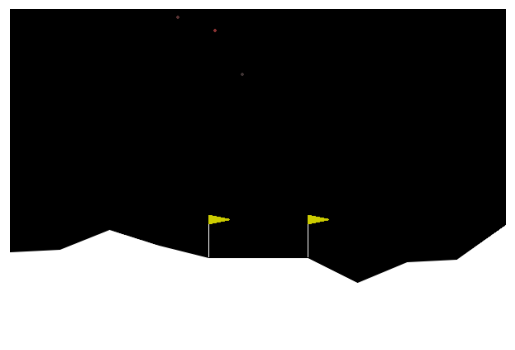

Action: [0.7261611 0.6417368]


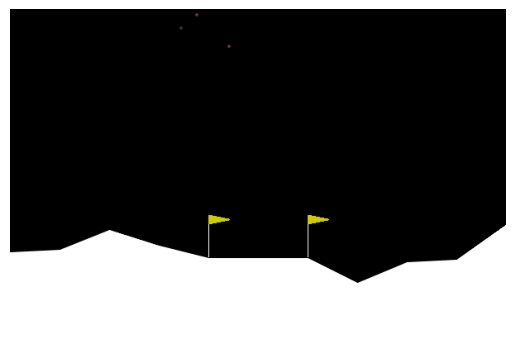

Action: [-0.33539286  0.3945695 ]


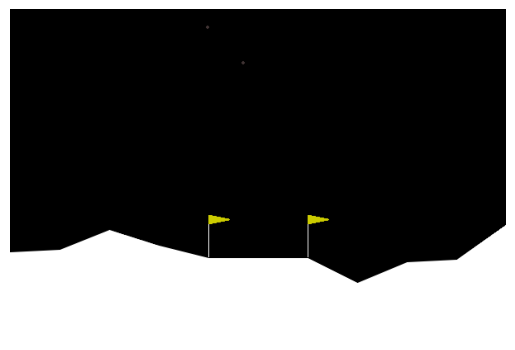

Action: [-0.58404857 -0.02626733]


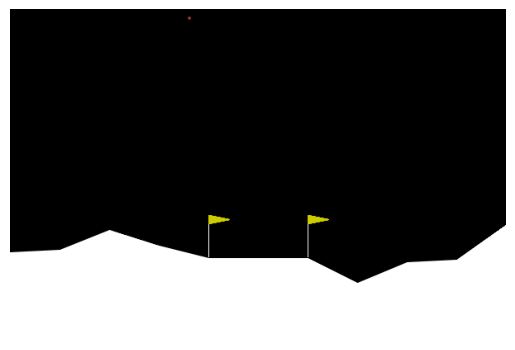

Action: [0.6104307 0.3527587]


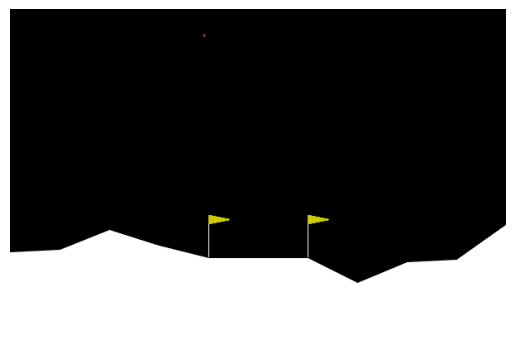

Action: [-0.5580198  -0.47271058]


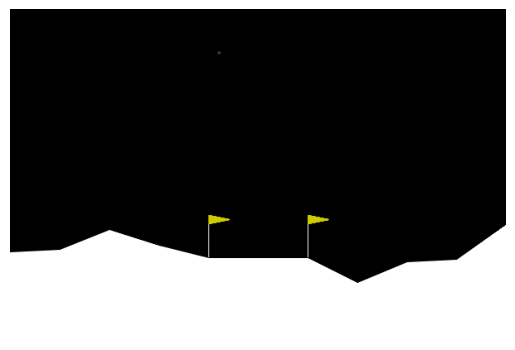

Action: [0.48700544 0.7780547 ]


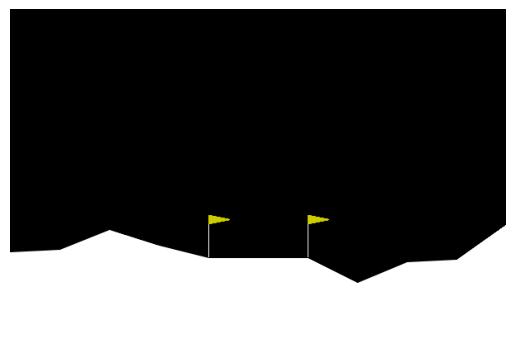

Action: [0.600791   0.15462452]


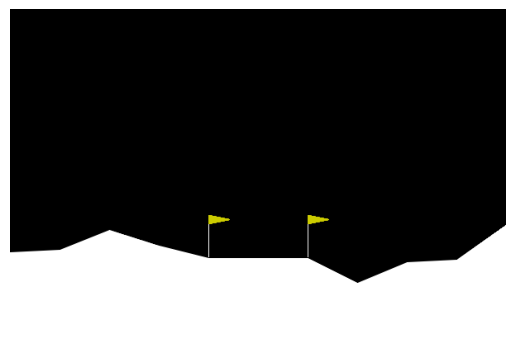

Action: [0.47079813 0.12904143]


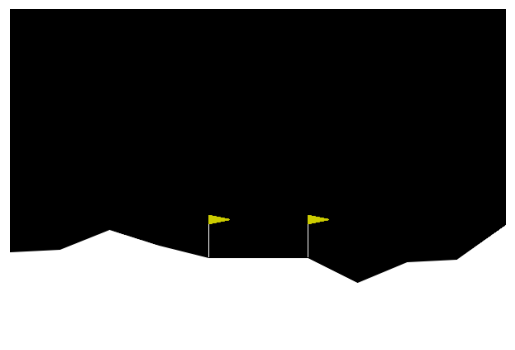

Action: [-0.5136429  0.3596713]


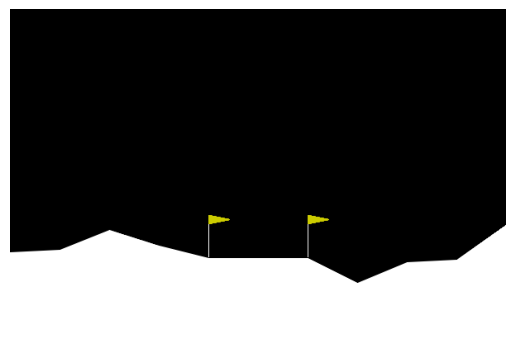

Action: [ 0.15607032 -0.17377107]


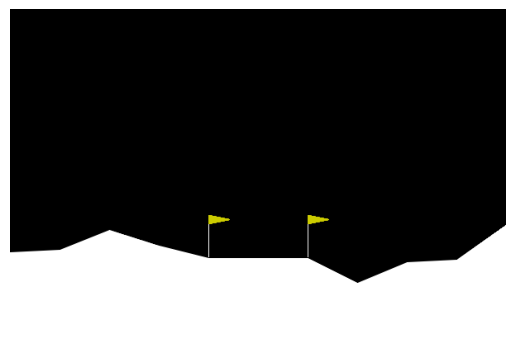

Action: [-0.5953859  -0.24462399]


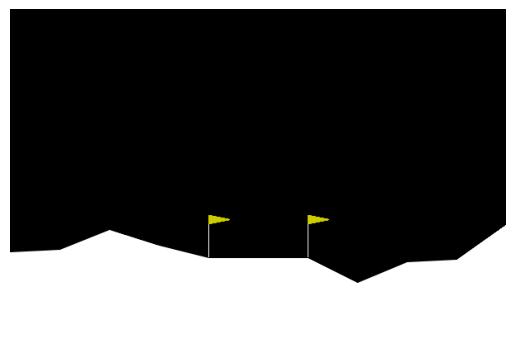

Action: [ 0.48234227 -0.95884   ]


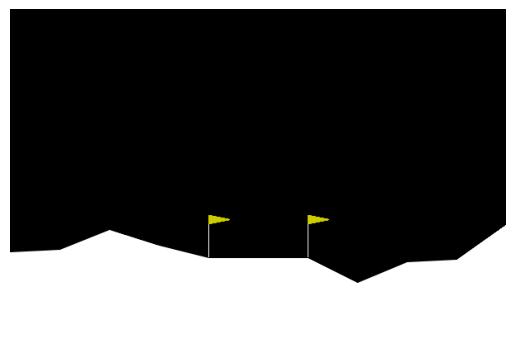

Action: [ 0.96293545 -0.5297908 ]


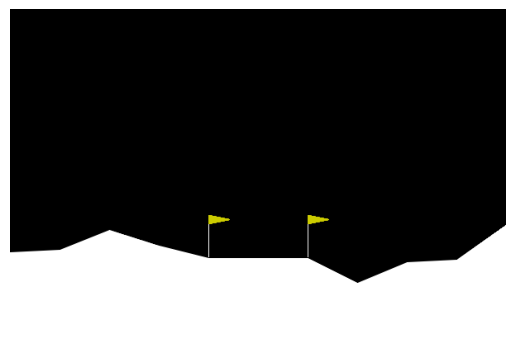

Action: [-0.78458285  0.15763368]


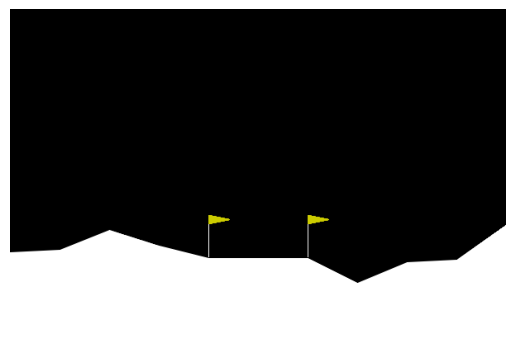

Action: [-0.8400127 -0.2683246]


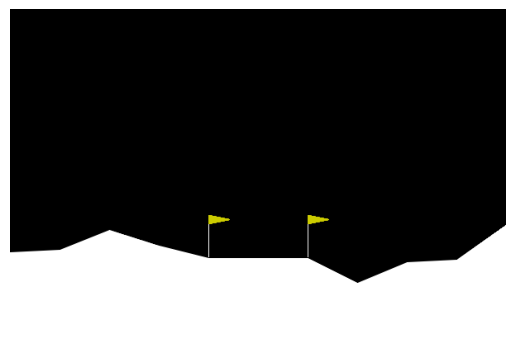

Action: [-0.36651272 -0.39646703]


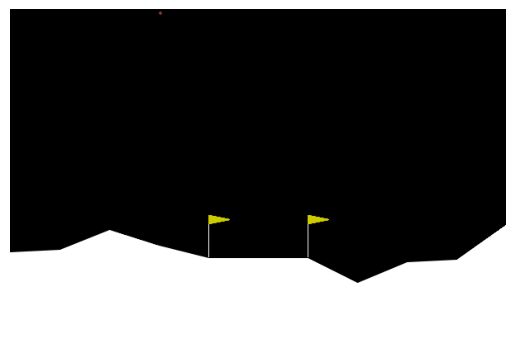

Action: [ 0.69370663 -0.7527647 ]


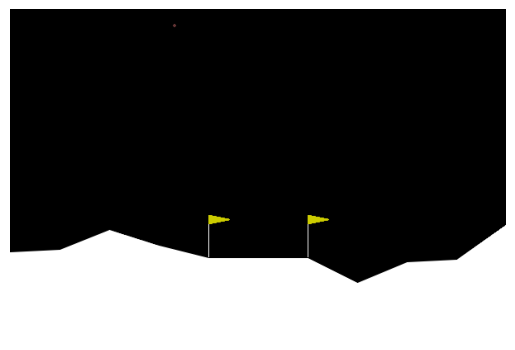

Action: [-0.5927227  -0.65169144]


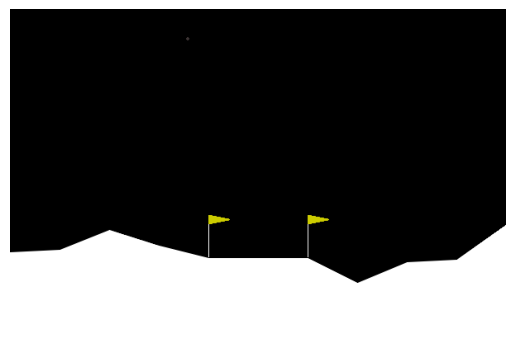

Action: [0.77005076 0.4011212 ]


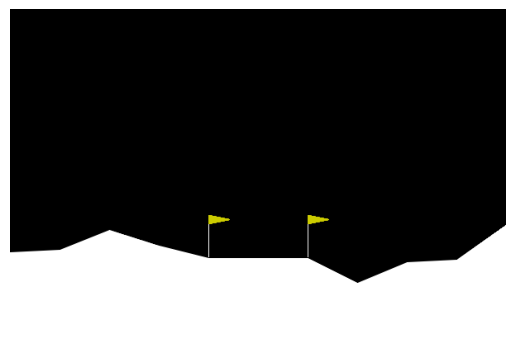

Action: [0.77679783 0.07456952]


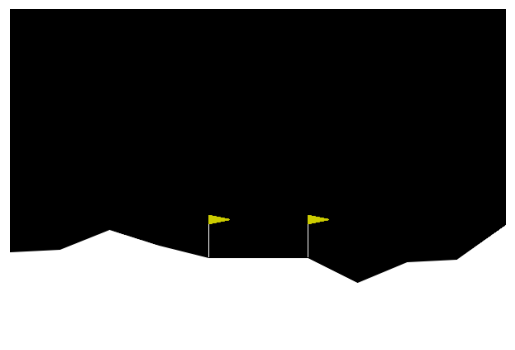

Action: [-0.74650884  0.4732693 ]


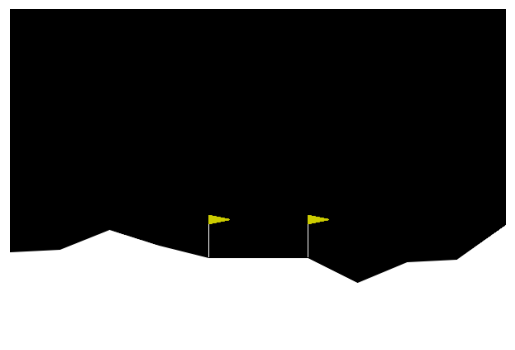

Action: [-0.2937903 -0.4642326]


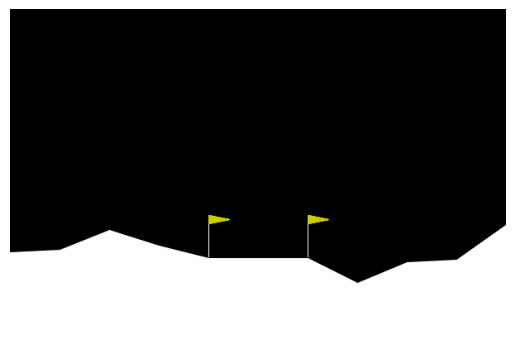

Action: [-0.40758514  0.3438691 ]


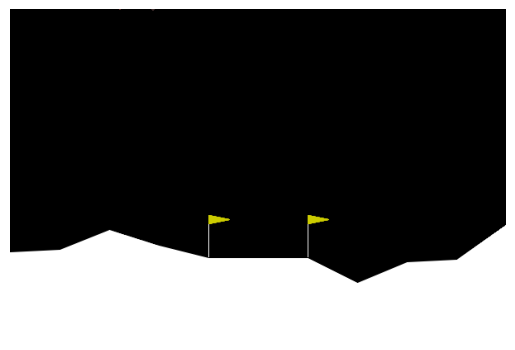

Action: [-0.6180688   0.42043483]


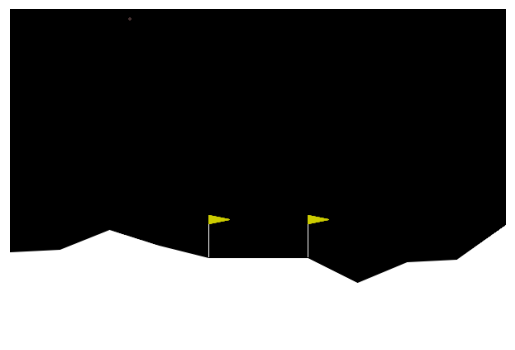

Action: [ 0.94298184 -0.56008506]


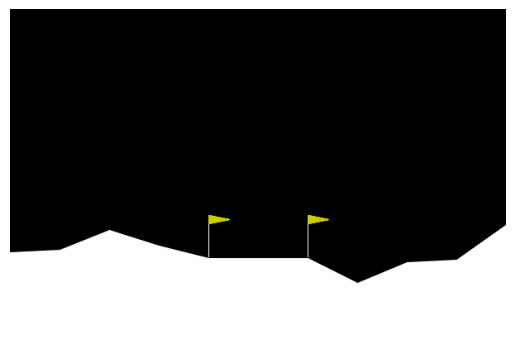

Action: [0.5174554 0.9089986]


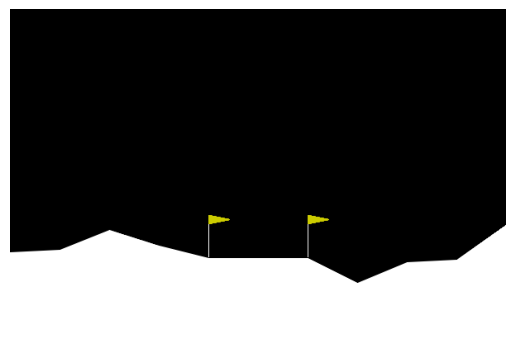

Action: [0.58232    0.18325196]


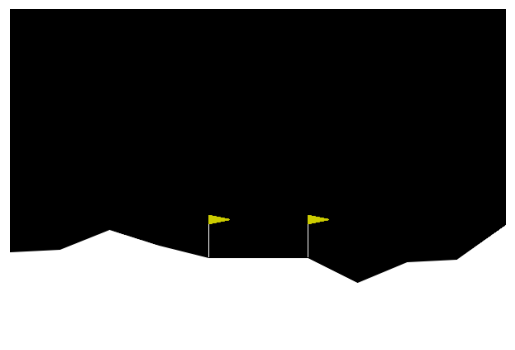

Action: [0.24669644 0.68512267]


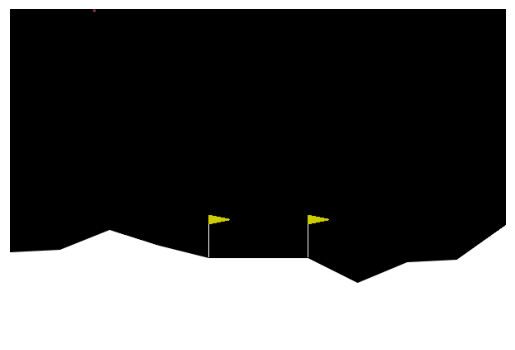

Action: [ 0.6242383  -0.09778371]


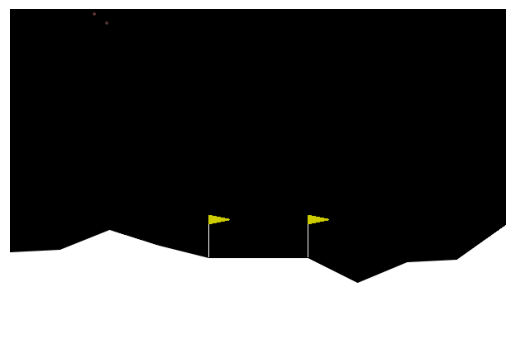

Action: [-0.9528995   0.63253677]


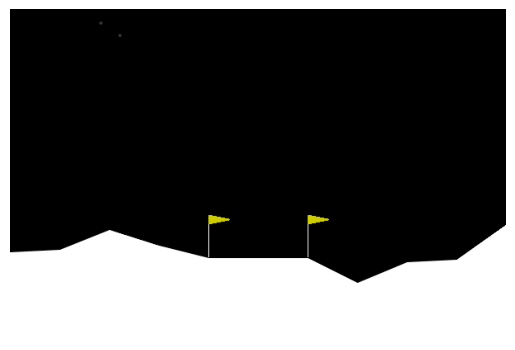

Action: [ 0.17548773 -0.2585523 ]


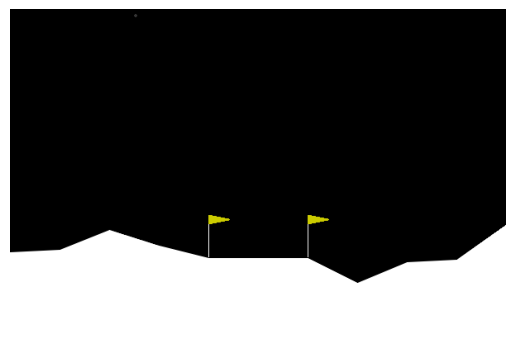

Action: [-0.08400887  0.79507864]


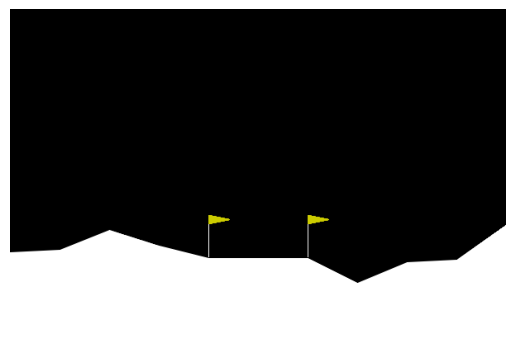

Action: [-0.42533883 -0.8307166 ]


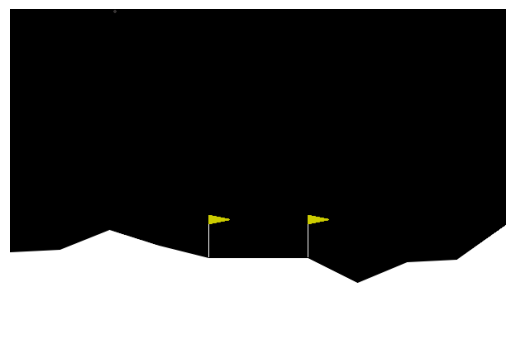

Action: [ 0.942823  -0.7775653]


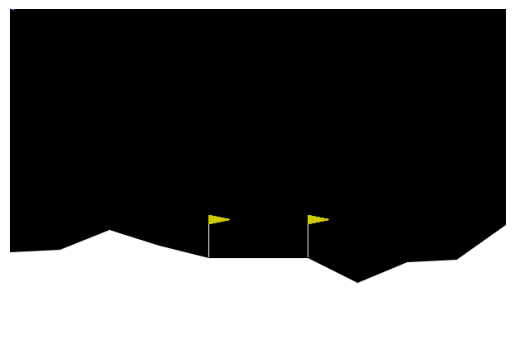

Action: [-0.6811181  0.6356974]


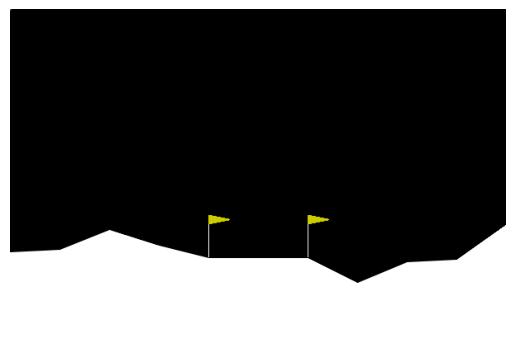

Action: [-0.49828568  0.53168863]


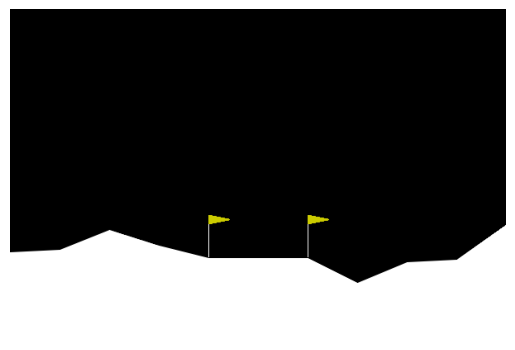

Action: [ 0.9641019  -0.87866646]


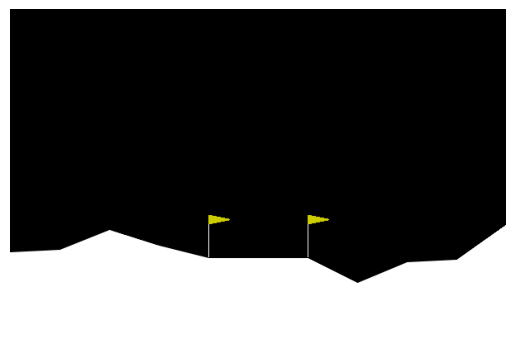

Action: [-0.8418002  -0.22998892]


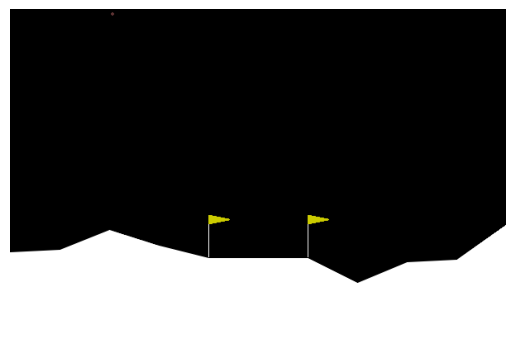

Action: [ 0.01976312 -0.22196236]


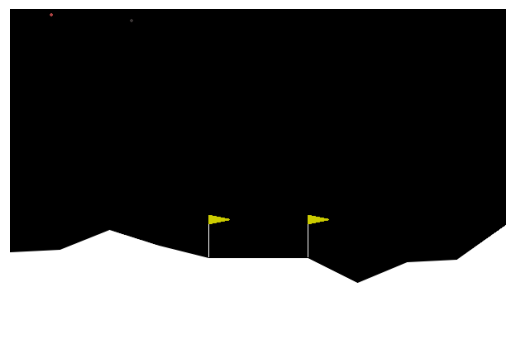

Action: [-0.4505398 -0.9440823]


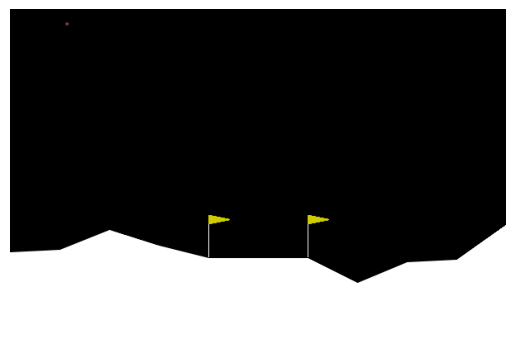

Action: [-0.18836473 -0.77218795]


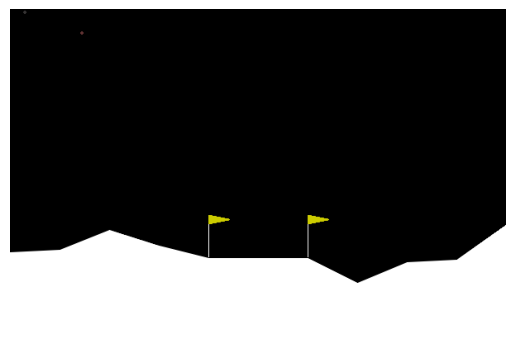

Action: [ 0.04329671 -0.18620446]


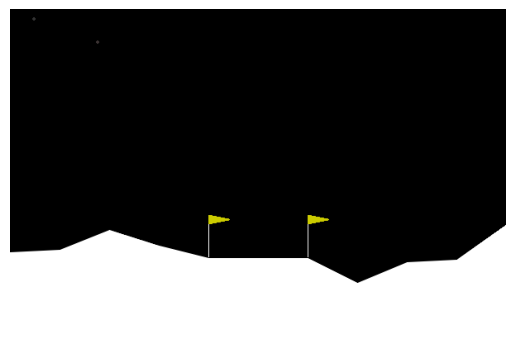

Action: [-0.7172417   0.73692024]


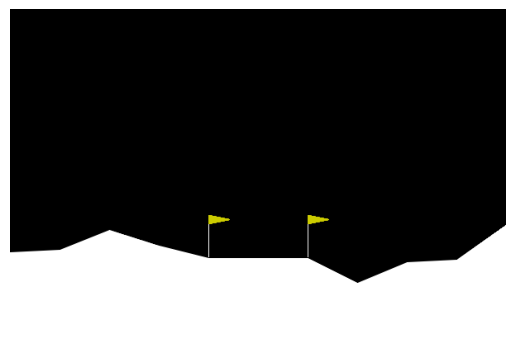

Action: [ 0.14110233 -0.71859694]


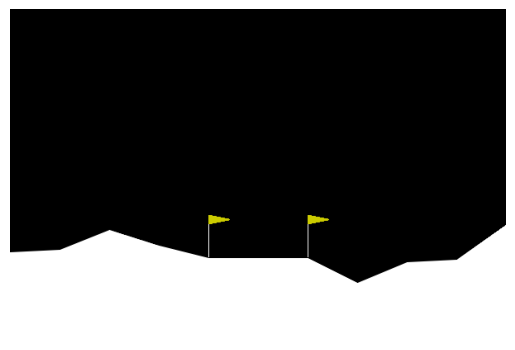

Action: [-0.93652004  0.09923373]


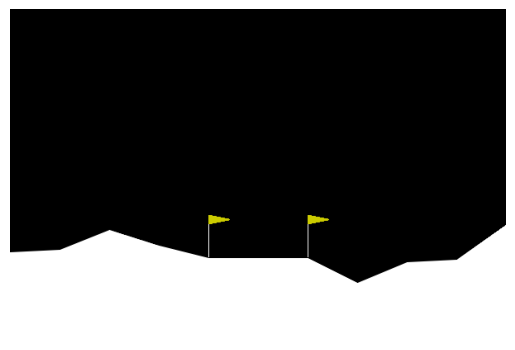

Action: [ 0.5049765  -0.36974013]


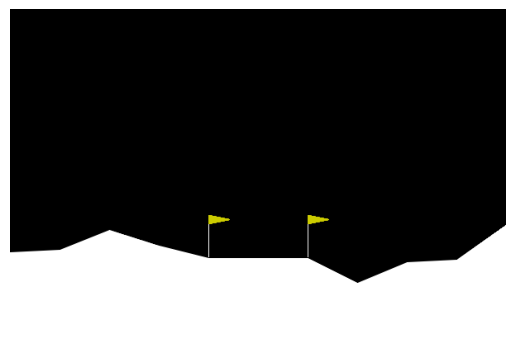

Action: [-0.74895674 -0.3217771 ]


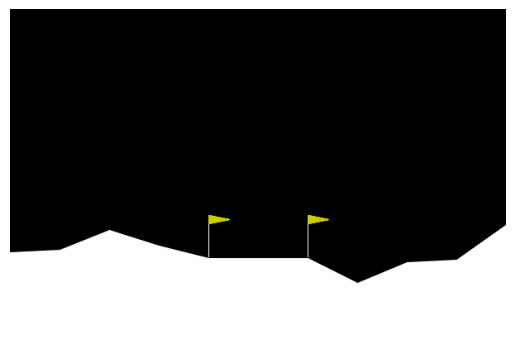

Action: [0.5989807  0.93738574]


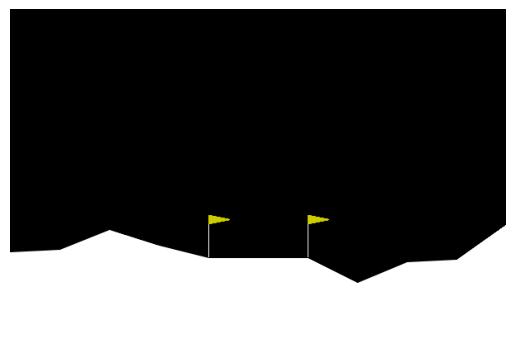

Action: [ 0.882924  -0.5142679]


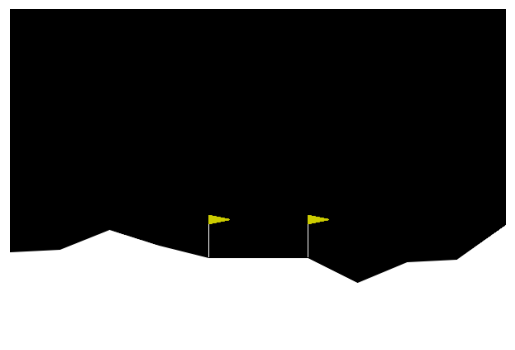

In [73]:
i = 1

while i < 100:
  take_random_step(env)
  plot_current_frame(env)
  i += 1

## Activity 3: Training a Vanilla RL Policy

There are [different policies](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html) to choose from.

### RL Algorithms

This table displays the RL algorithms that are implemented in the Stable Baselines3 project, along with some useful characteristics: support for discrete/continuous actions, multiprocessing.

| Name           | Box | Discrete | MultiDiscrete | MultiBinary | Multi Processing |
|----------------|-----|----------|---------------|-------------|------------------|
| ARS            | ✔️   | ✔️        | ❌             | ❌           | ✔️                |
| A2C            | ✔️   | ✔️        | ✔️             | ✔️           | ✔️                |
| DDPG           | ✔️   | ❌        | ❌             | ❌           | ✔️                |
| DQN            | ❌   | ✔️        | ❌             | ❌           | ✔️                |
| HER            | ✔️   | ❌        | ❌             | ❌           | ✔️                |
| PPO            | ✔️   | ✔️        | ✔️             | ✔️           | ✔️                |
| QR-DQN         | ❌   | ✔️        | ❌             | ❌           | ✔️                |
| RecurrentPPO   | ✔️   | ✔️        | ✔️             | ✔️           | ✔️                |
| SAC            | ✔️   | ❌        | ❌             | ❌           | ✔️                |
| TD3            | ✔️   | ❌        | ❌             | ❌           | ✔️                |
| TQC            | ✔️   | ❌        | ❌             | ❌           | ✔️                |
| TRPO           | ✔️   | ✔️        | ✔️             | ✔️           | ✔️                |
| Maskable PPO   | ✔️   | ✔️        | ✔️             | ✔️           | ✔️                |

Since our action space is `continuous` and in `Box` mode, our choice of algorithms can be found from this table above. A2C, DDPG, PPO, SAV, TD3, etc. are some algorithms that we can try.

### Define the Policy

Let's try training a simple policy-based approach to begin with (PPO). First, we need to define the policy:

In [74]:
model = PPO("MlpPolicy", env, verbose = 1, learning_rate = 0.0003, n_steps = 2048)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


This line of code initialises a Proximal Policy Optimisation (PPO) reinforcement learning model using the `MlpPolicy` which is using an MLP (Multi-Layer Perceptron), which is a neural network as the policy network architecture.

`verbose = 1` controls the level of verbosity (output information)
`learning_rate` sets the learning rate of the network during training.
`n_steps = 2048` defines the number of steps the agent will take in the environment before updating the policy. This is also known as the number of steps per epoch.

### Training the Policy

Now, let's train the policy for a total of 100,000 timesteps. With an `n_steps = 2048` that would be at least 49 iterations. Observe that the mean episode length and reward increase with training.

In [75]:
model.learn(total_timesteps = 100000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 106      |
|    ep_rew_mean     | -285     |
| time/              |          |
|    fps             | 706      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 103          |
|    ep_rew_mean          | -250         |
| time/                   |              |
|    fps                  | 601          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0072707077 |
|    clip_fraction        | 0.0643       |
|    clip_range           | 0.2          |
|    entropy_loss         | -2.85        |
|    explained_variance   | -0.000845    |
|    learning_r

### Loading/Saving the policy

Saving the trained model

In [76]:
model.save("ppo_lunarlander")

Loading saved model

In [77]:
model = PPO.load("ppo_lunarlander", env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


### Evaluating the Policy

Let's evaluate the model and observe the rewards for a single episode:

In [81]:
# Reset the environment to it's initial state
obs, info = env.reset()

# max_steps to run simulation for
max_steps = 1000
rewards = []

for i in range(max_steps):
    action, _ = model.predict(obs, deterministic = True)
    obs, reward, terminate, truncate, info = env.step(action)
    rewards.append(reward)
    if terminate or truncate:
        break

print(f"Total Reward:{sum(rewards):.2f}")
print("Total Number of steps: ", i)
print("Terminated:", terminate)

Total Reward:-249.43
Total Number of steps:  632
Terminated: True


Let's wrap this code into a function for future use:

In [82]:
def evaluate_episode(env, model, max_steps=1000):
    obs, info = env.reset()
    rewards = []

    for i in range(max_steps):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminate, truncate, info = env.step(action)
        rewards.append(reward)
        if terminate or truncate:
            break

    total_reward = sum(rewards)
    terminated = terminate

    print(f"Total Reward: {total_reward:.2f}")
    print("Total Number of steps:", i)
    print("Terminated:", terminated)

    return total_reward, i, terminated

Let's plot the rewards over timesteps:

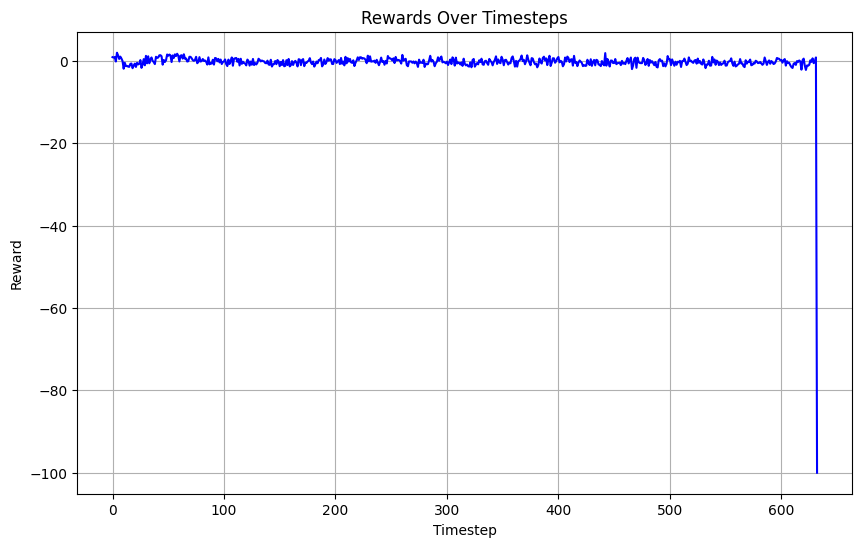

In [83]:
# Plotting rewards over timesteps
plt.figure(figsize=(10, 6))
plt.plot(rewards, marker='', linestyle='-', color='b')
plt.title('Rewards Over Timesteps')
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.grid(True)
plt.show()

### Visualising the Episode

Function to Simulate and Render Episode Frames

In [84]:
# Function to Simulate and Render Episode Frames
def simulate_and_render(env, model, max_steps = 1000):
    # Reset environment to initial state
    obs, info = env.reset()
    frames = []
    terminate = truncate = False
    for _ in range(max_steps):
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, terminate, truncate, info = env.step(action)
        frame = env.render()
        frames.append(frame)
        if terminate or truncate:
            break
    return frames

Function to Animate Frames to Display in Notebook

In [85]:
# Function to Animate Frames to Display in Notebook
def animate_episode_frames(frames, interval=50):
    fig, ax = plt.subplots()
    patch = ax.imshow(frames[0])
    plt.axis('off')
    plt.close()

    def animate(i):
        patch.set_data(frames[i])

    ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=interval)

    return HTML(ani.to_jshtml())

Putting it together:

In [89]:
frames = simulate_and_render(env, model, max_steps=2000)
animate_episode_frames(frames)

*The cell above might be responsible for increasing the notebook size. If that becomes an issue, you can just clear the output of the cell*

## Activity 4: Customising the Gym Environment (Observations, Actions, Rewards)

### Custom Observations

Gym supports the use of `ObservationWrapper` to modify the observation space and create Custom Observations.

Observation wrappers are useful if you want to apply some function to the observations that are returned by an environment. If you implement an observation wrapper, you only need to define this transformation by implementing the `gymnasium.ObservationWrapper.observation()` method. Moreover, you should remember to update the observation space, if the transformation changes the shape of observations (e.g. by transforming dictionaries into numpy arrays, as in the following example).

The following values are available to us -
- observation scale factors
- lander mass
- value of g

Let's create a custom observation to demonstrate this. The custom observation we choose to add is the Potential Energy of the Lander.

$Potential Energy = m * g * h$

In [100]:
scale_factors = np.array([10, 6.666, 5, 7.5, 1, 2.5, 1, 1], dtype=np.float32)
lander_mass = 4.82 # kg
g = 10  # m/s^2

Defining the custom observation wrapper

In [94]:
class CustomObservationWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super(CustomObservationWrapper, self).__init__(env)
        # Get the old observation space
        old_space = env.observation_space

        # Define new observation space bounds
        low = np.concatenate([old_space.low, [0]])
        high = np.concatenate([old_space.high, [np.inf]])
        # Define new observation space
        self.observation_space = gym.spaces.Box(
            low=low, high=high, dtype=np.float32
        )

    def observation(self, obs):
        # Extract and scale original observations
        x, y, vx, vy, theta, omega, leg1, leg2 = obs * scale_factors

        # Calculate potential energy
        PE = lander_mass * g * y

        return np.append(obs, PE)

How to wrap the environment with the custom observation wrapper:

In [ ]:
# env = CustomObservationWrapper(env)

#### Exercise

Modify the `CustomObservationWrapper` to include two additional observations:

- Kinetic Energy Along x-axis
- Kinetic Energy Along y-axis

*Hints:*
- The velocity along x and y axis is available in the original observations
- $Kinetic Energy = 1/2 * mass * (velocity)^2$

In [108]:
class CustomObservationWrapper(gym.ObservationWrapper):
    def __init__(self, env):
        super(CustomObservationWrapper, self).__init__(env)
        # Get the old observation space
        old_space = env.observation_space

        # Define new observation space bounds
        low = np.concatenate([old_space.low, [0]])          # Modify HERE
        high = np.concatenate([old_space.high, [np.inf]])   # Modify HERE
        # Define new observation space
        self.observation_space = gym.spaces.Box(
            low=low, high=high, dtype=np.float32
        )

    def observation(self, obs):
        # Extract and scale original observations
        x, y, vx, vy, theta, omega, leg1, leg2 = obs * scale_factors

        # Calculate potential energy
        PE = lander_mass * g * y

        # Calculate Kinetic Energies HERE
        KEx = (1 / 2) * lander_mass * (vx ** 2 )
        KEy = (1 / 2) * lander_mass * (vy ** 2 )
        return np.append(obs, PE, KEx, KEy)

In [ ]:
# env = CustomObservationWrapper(env)

### Custom Actions

*Do you remember the action space?*

### Action Space

- If `continuous=True` is passed, continuous actions (corresponding to the throttle of the engines) will be used and the action space will be `Box(-1, +1, (2,), dtype=np.float32)`.
- The first coordinate of an action determines the throttle of the main engine, while the second coordinate specifies the throttle of the lateral boosters.
    - Given an action `np.array([main, lateral])`
        - the main engine will be turned off completely if main < 0
        - the throttle scales affinely from 50% to 100% for `0 <= main <= 1` (in particular, the main engine doesn’t work with less than 50% power).
    - Similarly
        - if `-0.5 < lateral < 0.5`, the lateral boosters will not fire at all.
        - If lateral < -0.5, the left booster will fire, and
        - if lateral > 0.5, the right booster will fire.
    - Again, the throttle scales affinely from 50% to 100% between -1 and -0.5 (and 0.5 and 1, respectively).

**Let's Simplify The Action Space!**

- Define 3 Action variables corresponding to the 3 boosters - values will range from 0 to 1
- Modified throttle control:
    - throttle 0 means idle
    - throttle > 0 will start from 50% with throttle 1 will equal 100%

In [96]:
class CustomActionWrapper(gym.ActionWrapper):
    def __init__(self, env):
        super().__init__(env)
        # Define new action space with 3 actions ranging from 0 to 1
        self.action_space = gym.spaces.Box(
            low = 0, high = 1, shape = (3,), dtype = np.float32
        )

    def action(self, action):
        # Extract the three acitons
        main, left, right = action

        # Calculate the main engine throttle
        main_engine = -1 if main < 0 else main

        # Calculate the lateral engine throttles
        left_engine = (-1) * left/2 + 0.5
        right_engine = right/2 + 0.5

        lateral = left_engine + right_engine
        return np.array([main_engine, lateral])


#### Exercise:

Some issues with this action space:

- What to do if both left/right thrusters have positive throttle? -> Fire the one with higher value
- What if they have the same throttle? -> Fire None
- If only 0 means idle then the throttle might be active most of the time for the rockets, let's set a lower cutoff like 0.25 instead to discourage using of thrusters.

This relationship can be expressed by the following equation: $ y = 2/3 (x-1) + 1$

Let's fix the action wrapper accordingly!

In [101]:
class CustomActionWrapper(gym.ActionWrapper):
    def __init__(self, env):
        super().__init__(env)
        # Define new action space with 3 actions ranging from 0 to 1
        self.action_space = gym.spaces.Box(
            low = 0, high = 1, shape = (3,), dtype = np.float32
        )

    def action(self, action):
        # Extract the three acitons
        main, left, right = action

        # Calculate the main engine throttle
        main_engine = -1 if main == 0 else (main/2 + 0.5)

        # Make changes around HERE
        # Calculate the lateral engine throttles
        left_engine = (-1)*left/2 + 0.5
        right_engine = right/2 + 0.5
        lateral = left_engine + right_engine

        return np.array([main_engine, lateral])

### Custom Rewards

Reward wrappers are used to transform the reward that is returned by an environment. As for the previous wrappers, you need to specify that transformation by implementing the `gymnasium.RewardWrapper.reward()` method. Also, you might want to update the reward range of the wrapper.

The following is an example of how to use the `RewardWrapper` class for custom rewards:

In [98]:
class CustomReward(gym.RewardWrapper):
    def __init__(self, env, min_reward, max_reward):
        super().__init__(env)

    def reward(self, reward):
        # Make modifications to the reward function here
        return reward

Let's try something different now and use the `gym.Wrapper` class to reproduce the existing rewards so that we can modify them:

In [99]:
class CustomRewardWrapper(gym.Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.prev_shaping = None

    def step(self, action):
        state, reward, terminate, truncate, info = self.env.step(action)  # take a step using the original environment

        x, y, vx, vy, theta, omega, leg1, leg2 = \
            state[0], state[1], state[2], state[3], state[4], state[5], state[6], state[7]

        shaping = (
            -100 * np.sqrt(x*x + y*y)
            - 100 * np.sqrt(vx*vx + vy*vy)
            - 100 * abs(theta)
            + 10 * leg1
            + 10 * leg2
        )

        if self.prev_shaping is not None:
            reward = shaping - self.prev_shaping
        self.prev_shaping = shaping

        # calculate engine powers from action
        m_power = (np.clip(action[0], 0.0, 1.0) + 1.0) * 0.5
        direction = np.sign(action[1])
        s_power = np.clip(np.abs(action[1]), 0.5, 1.0)

        # Subtract power costs from the reward
        reward -= (m_power * 0.30)  # Main engine power penalty
        reward -= (s_power * 0.03)  # Side engine power penalty

        # Check for termination conditions
        if self.unwrapped.game_over or abs(state[0]) >= 1.0:
            reward = -100
        if not self.unwrapped.lander.awake:

            # check position relative to the landing zone - high reward (centre of landing zone) | low reward (edge of landing zone)
            reward = +100

        return state, reward, terminate, truncate, info

*We can also achieve the same using the `gym.RewardWrapper`. Showing `gym.Wrapper` class as an example*

#### Exercise

Make the following modifications to the reward function -

- [ ] Change the Reward shaping: Introduce a Higher Penalty for deviating from the center
- [ ] Add another penalty to avoid having high values of Angular Velocity

Think of at least one other Custom Reward and implement it into the Custom Reward Wrapper.

### Putting Everything Together

Now that we have multiple wrappers to our environment, let's put them together. We can just simply wrap each environment on top of each other like this:

In [102]:
env = gym.make(
    "LunarLander-v2",
    continuous=True,
    gravity=-10.0,
    enable_wind=False,
    wind_power=15.0,
    turbulence_power=1.5,
    render_mode = "rgb_array"
)

env = CustomObservationWrapper(env)
env = CustomActionWrapper(env)
env = CustomRewardWrapper(env)

Let's quickly check our new wrapped environment now to make sure everything is in order:

In [103]:
print("Observation Space: ", env.observation_space)
print("Action Space: ", env.action_space)

# Reset environment
obs, info = env.reset()

# Take a random action and get the reward
random_action = env.action_space.sample()
obs, reward, terminate, truncate, info = env.step(random_action)
print("Reward: ", reward)

Observation Space:  Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.         0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.              inf], (9,), float32)
Action Space:  Box(0.0, 1.0, (3,), float32)
Reward:  1.7263292420095715


### Different Policies

We can easily swap out policies in a plug-and-play manner with the `stable_baselines3` RL Library. Following are a few examples. Feel free to try them out:

In [104]:
#model = DDPG("MlpPolicy", env, verbose=1)
#model = SAC("MlpPolicy", env, verbose=1)
#model = TD3("MlpPolicy", env, verbose=1)
model = PPO("MlpPolicy", env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Train & Save Model

In [105]:
model.learn(total_timesteps=100000)
model.save("lunarlander_policy_custom")

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.5     |
|    ep_rew_mean     | -243     |
| time/              |          |
|    fps             | 787      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 88.2         |
|    ep_rew_mean          | -226         |
| time/                   |              |
|    fps                  | 600          |
|    iterations           | 2            |
|    time_elapsed         | 6            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0037880451 |
|    clip_fraction        | 0.0277       |
|    clip_range           | 0.2          |
|    entropy_loss         | -4.25        |
|    explained_variance   | 4.07e-05     |
|    learning_r

Evaluate:

In [106]:
evaluate_episode(env, model)

Total Reward: -526.46
Total Number of steps: 59
Terminated: True


(-526.4600293838031, 59, True)

In [107]:
frames = simulate_and_render(env, model)
animate_episode_frames(frames)

#### Exercise

- Swap out the existing policy for a different policy than PPO. Train your environment for `100000` steps again and evaluate/see the results.

Try on your own time (might take a while to run):
- Make modifications to the environment
- For each modification, train for a small number of iterations (100,000) to observe that it doesn't negatively impact the policy behavior
- Train your choice of policy for 1 Million timesteps and observe the results (don't forget to save and download your policy for future use!)

## Activity 5: Interdiscilinery Reflection